In [1]:
from stock_methods import get_data_with_labels
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint


2012-01-01
2012-06-21
2012-12-04
2013-05-16
2013-10-17
2014-03-28
2014-09-11
2015-02-26
2015-08-06
2016-01-27
2016-07-08
2016-12-01
2017-03-31
2017-07-20
2017-11-02
2018-02-27
2018-06-20
2018-09-28
2019-01-08
2019-04-22
2019-07-31
2019-11-08
2020-02-20
2020-05-18
2020-08-24
2020-12-01
2021-03-16


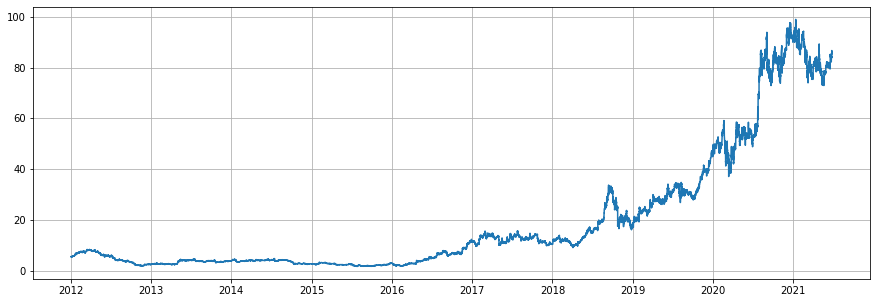

In [2]:
data_stock, barriers, bunch_of_features = get_data_with_labels("AMD")

In [3]:
data_stock

,volume,vw,open,close,high,low,number
2012-01-03 12:00:00,1100.0,5.5000,5.50,5.50,5.500,5.5000,6
2012-01-03 13:00:00,24951.0,5.5243,5.48,5.54,5.540,5.4800,29
2012-01-03 14:00:00,1359139.0,5.5509,5.40,5.55,5.590,5.4000,3115
2012-01-03 15:00:00,2822896.0,5.5226,5.55,5.52,5.580,5.4500,5652
2012-01-03 16:00:00,1179854.0,5.4913,5.52,5.49,5.525,5.4700,2604
...,...,...,...,...,...,...,...
2021-06-25 18:00:00,2089344.0,85.7622,85.59,85.97,86.010,85.5199,17275
2021-06-25 19:00:00,4443587.0,85.7221,85.97,85.62,86.040,85.4400,38167
2021-06-25 20:00:00,641726.0,85.6163,85.62,85.57,85.630,85.5300,373
2021-06-25 21:00:00,22529.0,85.5679,85.56,85.57,85.620,85.5600,171


In [4]:
barriers

,days_passed,price,vert_barrier,top_barrier,bottom_barrier,out
2012-01-03 14:00:00,1,5.55,2012-01-04 14:00:00,5.614373,5.507085,-1
2012-01-03 15:00:00,2,5.52,2012-01-04 15:00:00,5.625644,5.449571,0
2012-01-03 16:00:00,3,5.49,2012-01-04 16:00:00,5.589851,5.423432,0
2012-01-03 17:00:00,4,5.485,2012-01-04 17:00:00,5.569527,5.428649,0
2012-01-03 18:00:00,5,5.46,2012-01-04 18:00:00,5.538203,5.407864,0
...,...,...,...,...,...,...
2021-06-25 18:00:00,33482,85.97,NaN,87.184489,85.160341,None
2021-06-25 19:00:00,33483,85.62,NaN,86.821888,84.818741,None
2021-06-25 20:00:00,33484,85.57,NaN,86.722852,84.801432,None
2021-06-25 21:00:00,33485,85.57,NaN,86.675785,84.83281,None


In [5]:
bunch_of_features

,volume_1,price_spread_1,close_loc_1,close_change_1,rsi_1,volume_2,price_spread_2,close_loc_2,close_change_2,rsi_2,...,volume_40,price_spread_40,close_loc_40,close_change_40,rsi_40,volume_60,price_spread_60,close_loc_60,close_change_60,rsi_60
2012-01-03 12:00:00,1100.0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 13:00:00,24951.0,0.0600,0.000000,0.040,NaN,26051.0,0.06,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 14:00:00,1359139.0,0.1900,0.210526,0.010,NaN,1384090.0,0.19,0.210526,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 15:00:00,2822896.0,0.1300,0.461538,-0.030,NaN,4182035.0,0.19,0.368421,-0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03 16:00:00,1179854.0,0.0550,0.636364,-0.030,NaN,4002750.0,0.13,0.692308,-0.030,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25 18:00:00,2089344.0,0.4901,0.081616,0.385,55.830368,4184676.0,0.54,0.074074,0.385,53.215062,...,85338159.0,4.1499,0.281910,0.385,61.730583,116378729.0,4.9699,0.235397,0.385,58.060703
2021-06-25 19:00:00,4443587.0,0.6000,0.700000,-0.350,50.586520,6532931.0,0.60,0.700000,-0.350,53.208444,...,89705591.0,4.1399,0.367134,-0.350,61.589656,120783393.0,4.9699,0.305821,-0.350,58.263004
2021-06-25 20:00:00,641726.0,0.1000,0.600000,-0.050,49.865959,5085313.0,0.60,0.783333,-0.050,50.226240,...,90230090.0,3.9796,0.394487,-0.050,61.415451,121417738.0,4.9699,0.315882,-0.050,58.522512
2021-06-25 21:00:00,22529.0,0.0600,0.833333,0.000,49.865959,664255.0,0.10,0.600000,0.000,49.865959,...,84598576.0,3.5599,0.440996,0.000,61.119468,121438342.0,4.9699,0.315882,0.000,58.778393


In [6]:
dropna_barriers = barriers.dropna()
data = bunch_of_features[60:-13].assign(out=dropna_barriers[58:-2].out)
data.dropna(inplace=True)
out = data.out
out=out.astype('int')
data.drop('out', axis=1, inplace=True)
data

,volume_1,price_spread_1,close_loc_1,close_change_1,rsi_1,volume_2,price_spread_2,close_loc_2,close_change_2,rsi_2,...,volume_40,price_spread_40,close_loc_40,close_change_40,rsi_40,volume_60,price_spread_60,close_loc_60,close_change_60,rsi_60
2012-01-11 14:00:00,1952248.0,0.140,0.071429,0.130,70.903003,1956483.0,0.140,0.071429,0.130,63.904476,...,35935452.0,0.4400,0.022727,0.130,58.506442,54007880.0,0.4500,0.022222,0.130,54.051188
2012-01-11 15:00:00,1915936.0,0.055,0.545455,0.015,72.031801,3868184.0,0.175,0.171429,0.015,71.467402,...,37850028.0,0.4750,0.063158,0.015,59.204060,54446694.0,0.4850,0.061856,0.015,54.527080
2012-01-11 16:00:00,1020687.0,0.040,0.875000,-0.030,66.477168,2936623.0,0.065,0.923077,-0.030,69.254484,...,38867815.0,0.4750,0.126316,-0.030,59.762812,54397812.0,0.4850,0.123711,-0.030,55.024704
2012-01-11 17:00:00,1490346.0,0.030,0.666667,0.005,66.934820,2511033.0,0.040,0.750000,0.005,66.705994,...,40358061.0,0.4550,0.120879,0.005,60.500128,55374813.0,0.4850,0.113402,0.005,55.393256
2012-01-11 18:00:00,1463244.0,0.060,1.000000,-0.030,61.508954,2953590.0,0.060,1.000000,-0.030,64.221887,...,40772158.0,0.4550,0.186813,-0.030,60.729253,56378633.0,0.4850,0.175258,-0.030,55.713479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24 21:00:00,49888.0,0.080,0.125000,0.040,64.826650,288400.0,0.150,0.066667,0.040,64.643787,...,89339314.0,4.6099,0.225580,0.040,60.985612,138237416.0,4.9699,0.209240,0.040,54.003292
2021-06-24 22:00:00,5813.0,0.060,0.000000,0.010,64.923833,55701.0,0.080,0.000000,0.010,64.875241,...,83466206.0,4.1499,0.248175,0.010,61.215417,138233312.0,4.9699,0.207228,0.010,54.160160
2021-06-24 23:00:00,12604.0,0.140,0.857143,-0.060,63.785081,18417.0,0.140,0.857143,-0.060,64.354457,...,79446043.0,4.1499,0.262633,-0.060,61.371774,138172948.0,4.9699,0.219300,-0.060,54.372762
2021-06-25 08:00:00,5455.0,0.100,0.300000,0.020,64.011676,18059.0,0.170,0.588235,0.020,63.898378,...,76211772.0,4.1499,0.257813,0.020,61.533836,137996118.0,4.9699,0.215276,0.020,54.641777


In [7]:
y_test = out[-100:]
x_test = data[-100:]

y_train = out[:-100]
x_train = data[:-100]

In [8]:
from catboost import CatBoostClassifier

param_grid = []

model = CatBoostClassifier(iterations=3000)

model.fit(x_train, y_train)
y_catboost_predictions = model.predict(x_test)

Learning rate set to 0.037275
0:	learn: 1.0951087	total: 83.7ms	remaining: 4m 11s
1:	learn: 1.0921177	total: 105ms	remaining: 2m 37s
2:	learn: 1.0893049	total: 127ms	remaining: 2m 6s
3:	learn: 1.0866107	total: 148ms	remaining: 1m 50s
4:	learn: 1.0838958	total: 171ms	remaining: 1m 42s
5:	learn: 1.0815269	total: 192ms	remaining: 1m 35s
6:	learn: 1.0791446	total: 218ms	remaining: 1m 33s
7:	learn: 1.0769675	total: 247ms	remaining: 1m 32s
8:	learn: 1.0749192	total: 274ms	remaining: 1m 30s
9:	learn: 1.0731681	total: 298ms	remaining: 1m 29s
10:	learn: 1.0713027	total: 322ms	remaining: 1m 27s
11:	learn: 1.0698604	total: 343ms	remaining: 1m 25s
12:	learn: 1.0683973	total: 363ms	remaining: 1m 23s
13:	learn: 1.0669113	total: 384ms	remaining: 1m 21s
14:	learn: 1.0653733	total: 404ms	remaining: 1m 20s
15:	learn: 1.0640465	total: 428ms	remaining: 1m 19s
16:	learn: 1.0627436	total: 455ms	remaining: 1m 19s
17:	learn: 1.0616110	total: 478ms	remaining: 1m 19s
18:	learn: 1.0604687	total: 503ms	remaining:

157:	learn: 1.0113112	total: 3.85s	remaining: 1m 9s
158:	learn: 1.0109690	total: 3.88s	remaining: 1m 9s
159:	learn: 1.0106287	total: 3.9s	remaining: 1m 9s
160:	learn: 1.0103926	total: 3.93s	remaining: 1m 9s
161:	learn: 1.0101981	total: 3.95s	remaining: 1m 9s
162:	learn: 1.0100042	total: 3.97s	remaining: 1m 9s
163:	learn: 1.0097061	total: 3.99s	remaining: 1m 9s
164:	learn: 1.0095300	total: 4.01s	remaining: 1m 8s
165:	learn: 1.0093843	total: 4.04s	remaining: 1m 8s
166:	learn: 1.0092309	total: 4.06s	remaining: 1m 8s
167:	learn: 1.0088778	total: 4.09s	remaining: 1m 8s
168:	learn: 1.0087314	total: 4.11s	remaining: 1m 8s
169:	learn: 1.0086075	total: 4.13s	remaining: 1m 8s
170:	learn: 1.0083271	total: 4.16s	remaining: 1m 8s
171:	learn: 1.0081981	total: 4.18s	remaining: 1m 8s
172:	learn: 1.0080626	total: 4.2s	remaining: 1m 8s
173:	learn: 1.0077579	total: 4.22s	remaining: 1m 8s
174:	learn: 1.0076404	total: 4.25s	remaining: 1m 8s
175:	learn: 1.0073863	total: 4.27s	remaining: 1m 8s
176:	learn: 1.

321:	learn: 0.9772837	total: 7.62s	remaining: 1m 3s
322:	learn: 0.9769199	total: 7.65s	remaining: 1m 3s
323:	learn: 0.9765875	total: 7.67s	remaining: 1m 3s
324:	learn: 0.9762254	total: 7.69s	remaining: 1m 3s
325:	learn: 0.9759124	total: 7.71s	remaining: 1m 3s
326:	learn: 0.9757204	total: 7.74s	remaining: 1m 3s
327:	learn: 0.9755158	total: 7.76s	remaining: 1m 3s
328:	learn: 0.9752081	total: 7.78s	remaining: 1m 3s
329:	learn: 0.9750404	total: 7.8s	remaining: 1m 3s
330:	learn: 0.9747440	total: 7.82s	remaining: 1m 3s
331:	learn: 0.9746354	total: 7.84s	remaining: 1m 3s
332:	learn: 0.9743255	total: 7.87s	remaining: 1m 3s
333:	learn: 0.9740622	total: 7.89s	remaining: 1m 2s
334:	learn: 0.9739416	total: 7.91s	remaining: 1m 2s
335:	learn: 0.9737108	total: 7.94s	remaining: 1m 2s
336:	learn: 0.9734052	total: 7.96s	remaining: 1m 2s
337:	learn: 0.9730383	total: 7.98s	remaining: 1m 2s
338:	learn: 0.9728478	total: 8s	remaining: 1m 2s
339:	learn: 0.9727381	total: 8.03s	remaining: 1m 2s
340:	learn: 0.97

486:	learn: 0.9394007	total: 11.4s	remaining: 58.8s
487:	learn: 0.9392009	total: 11.4s	remaining: 58.8s
488:	learn: 0.9390038	total: 11.4s	remaining: 58.8s
489:	learn: 0.9387153	total: 11.5s	remaining: 58.8s
490:	learn: 0.9384613	total: 11.5s	remaining: 58.7s
491:	learn: 0.9382752	total: 11.5s	remaining: 58.7s
492:	learn: 0.9379868	total: 11.5s	remaining: 58.7s
493:	learn: 0.9377731	total: 11.6s	remaining: 58.7s
494:	learn: 0.9375635	total: 11.6s	remaining: 58.6s
495:	learn: 0.9374352	total: 11.6s	remaining: 58.6s
496:	learn: 0.9373352	total: 11.6s	remaining: 58.6s
497:	learn: 0.9371400	total: 11.7s	remaining: 58.6s
498:	learn: 0.9370493	total: 11.7s	remaining: 58.5s
499:	learn: 0.9368602	total: 11.7s	remaining: 58.5s
500:	learn: 0.9366255	total: 11.7s	remaining: 58.5s
501:	learn: 0.9364207	total: 11.7s	remaining: 58.4s
502:	learn: 0.9362757	total: 11.8s	remaining: 58.4s
503:	learn: 0.9359943	total: 11.8s	remaining: 58.4s
504:	learn: 0.9358488	total: 11.8s	remaining: 58.4s
505:	learn: 

652:	learn: 0.9050728	total: 15.2s	remaining: 54.6s
653:	learn: 0.9046935	total: 15.2s	remaining: 54.6s
654:	learn: 0.9044427	total: 15.3s	remaining: 54.6s
655:	learn: 0.9042847	total: 15.3s	remaining: 54.6s
656:	learn: 0.9040965	total: 15.3s	remaining: 54.6s
657:	learn: 0.9038894	total: 15.3s	remaining: 54.5s
658:	learn: 0.9036054	total: 15.3s	remaining: 54.5s
659:	learn: 0.9035144	total: 15.4s	remaining: 54.5s
660:	learn: 0.9031479	total: 15.4s	remaining: 54.4s
661:	learn: 0.9029989	total: 15.4s	remaining: 54.4s
662:	learn: 0.9027901	total: 15.4s	remaining: 54.4s
663:	learn: 0.9026325	total: 15.5s	remaining: 54.4s
664:	learn: 0.9024332	total: 15.5s	remaining: 54.4s
665:	learn: 0.9021375	total: 15.5s	remaining: 54.3s
666:	learn: 0.9019491	total: 15.5s	remaining: 54.3s
667:	learn: 0.9016850	total: 15.5s	remaining: 54.3s
668:	learn: 0.9014673	total: 15.6s	remaining: 54.3s
669:	learn: 0.9012761	total: 15.6s	remaining: 54.2s
670:	learn: 0.9011100	total: 15.6s	remaining: 54.2s
671:	learn: 

815:	learn: 0.8762164	total: 18.9s	remaining: 50.7s
816:	learn: 0.8760977	total: 19s	remaining: 50.7s
817:	learn: 0.8759710	total: 19s	remaining: 50.7s
818:	learn: 0.8758553	total: 19s	remaining: 50.6s
819:	learn: 0.8757384	total: 19s	remaining: 50.6s
820:	learn: 0.8756273	total: 19.1s	remaining: 50.6s
821:	learn: 0.8754504	total: 19.1s	remaining: 50.6s
822:	learn: 0.8753103	total: 19.1s	remaining: 50.6s
823:	learn: 0.8751742	total: 19.1s	remaining: 50.5s
824:	learn: 0.8749356	total: 19.2s	remaining: 50.5s
825:	learn: 0.8748167	total: 19.2s	remaining: 50.5s
826:	learn: 0.8746206	total: 19.2s	remaining: 50.5s
827:	learn: 0.8745186	total: 19.2s	remaining: 50.4s
828:	learn: 0.8743271	total: 19.3s	remaining: 50.4s
829:	learn: 0.8742146	total: 19.3s	remaining: 50.4s
830:	learn: 0.8740873	total: 19.3s	remaining: 50.4s
831:	learn: 0.8739351	total: 19.3s	remaining: 50.4s
832:	learn: 0.8738242	total: 19.3s	remaining: 50.3s
833:	learn: 0.8737194	total: 19.4s	remaining: 50.3s
834:	learn: 0.873532

981:	learn: 0.8503383	total: 23.1s	remaining: 47.4s
982:	learn: 0.8501638	total: 23.1s	remaining: 47.4s
983:	learn: 0.8500598	total: 23.1s	remaining: 47.3s
984:	learn: 0.8499261	total: 23.1s	remaining: 47.3s
985:	learn: 0.8498044	total: 23.1s	remaining: 47.3s
986:	learn: 0.8495856	total: 23.2s	remaining: 47.3s
987:	learn: 0.8493947	total: 23.2s	remaining: 47.2s
988:	learn: 0.8492705	total: 23.2s	remaining: 47.2s
989:	learn: 0.8491093	total: 23.2s	remaining: 47.2s
990:	learn: 0.8488442	total: 23.3s	remaining: 47.2s
991:	learn: 0.8486242	total: 23.3s	remaining: 47.1s
992:	learn: 0.8484253	total: 23.3s	remaining: 47.1s
993:	learn: 0.8483297	total: 23.3s	remaining: 47.1s
994:	learn: 0.8480897	total: 23.4s	remaining: 47.1s
995:	learn: 0.8479663	total: 23.4s	remaining: 47.1s
996:	learn: 0.8478111	total: 23.4s	remaining: 47s
997:	learn: 0.8476902	total: 23.4s	remaining: 47s
998:	learn: 0.8475539	total: 23.5s	remaining: 47s
999:	learn: 0.8474247	total: 23.5s	remaining: 47s
1000:	learn: 0.84728

1141:	learn: 0.8268472	total: 27.1s	remaining: 44.1s
1142:	learn: 0.8266133	total: 27.1s	remaining: 44.1s
1143:	learn: 0.8265131	total: 27.1s	remaining: 44s
1144:	learn: 0.8263959	total: 27.2s	remaining: 44s
1145:	learn: 0.8262494	total: 27.2s	remaining: 44s
1146:	learn: 0.8260798	total: 27.2s	remaining: 44s
1147:	learn: 0.8258764	total: 27.2s	remaining: 43.9s
1148:	learn: 0.8257134	total: 27.3s	remaining: 43.9s
1149:	learn: 0.8256004	total: 27.3s	remaining: 43.9s
1150:	learn: 0.8254289	total: 27.3s	remaining: 43.9s
1151:	learn: 0.8252814	total: 27.3s	remaining: 43.8s
1152:	learn: 0.8251194	total: 27.4s	remaining: 43.8s
1153:	learn: 0.8250299	total: 27.4s	remaining: 43.8s
1154:	learn: 0.8249554	total: 27.4s	remaining: 43.8s
1155:	learn: 0.8248533	total: 27.4s	remaining: 43.7s
1156:	learn: 0.8246744	total: 27.4s	remaining: 43.7s
1157:	learn: 0.8244518	total: 27.5s	remaining: 43.7s
1158:	learn: 0.8243277	total: 27.5s	remaining: 43.7s
1159:	learn: 0.8241976	total: 27.5s	remaining: 43.6s
1

1300:	learn: 0.8057714	total: 31.1s	remaining: 40.6s
1301:	learn: 0.8056711	total: 31.1s	remaining: 40.6s
1302:	learn: 0.8053739	total: 31.1s	remaining: 40.5s
1303:	learn: 0.8052605	total: 31.2s	remaining: 40.5s
1304:	learn: 0.8051394	total: 31.2s	remaining: 40.5s
1305:	learn: 0.8050080	total: 31.2s	remaining: 40.5s
1306:	learn: 0.8049248	total: 31.2s	remaining: 40.5s
1307:	learn: 0.8047599	total: 31.3s	remaining: 40.4s
1308:	learn: 0.8045493	total: 31.3s	remaining: 40.4s
1309:	learn: 0.8044621	total: 31.3s	remaining: 40.4s
1310:	learn: 0.8042270	total: 31.3s	remaining: 40.4s
1311:	learn: 0.8040943	total: 31.4s	remaining: 40.4s
1312:	learn: 0.8038873	total: 31.4s	remaining: 40.3s
1313:	learn: 0.8038183	total: 31.4s	remaining: 40.3s
1314:	learn: 0.8037391	total: 31.4s	remaining: 40.3s
1315:	learn: 0.8036434	total: 31.5s	remaining: 40.3s
1316:	learn: 0.8034067	total: 31.5s	remaining: 40.3s
1317:	learn: 0.8033314	total: 31.5s	remaining: 40.2s
1318:	learn: 0.8032282	total: 31.6s	remaining:

1457:	learn: 0.7846577	total: 34.9s	remaining: 36.9s
1458:	learn: 0.7845811	total: 34.9s	remaining: 36.9s
1459:	learn: 0.7844465	total: 35s	remaining: 36.9s
1460:	learn: 0.7843603	total: 35s	remaining: 36.8s
1461:	learn: 0.7841880	total: 35s	remaining: 36.8s
1462:	learn: 0.7840648	total: 35s	remaining: 36.8s
1463:	learn: 0.7839454	total: 35s	remaining: 36.8s
1464:	learn: 0.7838074	total: 35.1s	remaining: 36.7s
1465:	learn: 0.7836558	total: 35.1s	remaining: 36.7s
1466:	learn: 0.7835763	total: 35.1s	remaining: 36.7s
1467:	learn: 0.7834109	total: 35.1s	remaining: 36.7s
1468:	learn: 0.7833370	total: 35.2s	remaining: 36.6s
1469:	learn: 0.7832242	total: 35.2s	remaining: 36.6s
1470:	learn: 0.7830947	total: 35.2s	remaining: 36.6s
1471:	learn: 0.7830291	total: 35.2s	remaining: 36.6s
1472:	learn: 0.7829539	total: 35.3s	remaining: 36.5s
1473:	learn: 0.7827622	total: 35.3s	remaining: 36.5s
1474:	learn: 0.7826890	total: 35.3s	remaining: 36.5s
1475:	learn: 0.7825791	total: 35.3s	remaining: 36.5s
147

1615:	learn: 0.7662012	total: 38.7s	remaining: 33.2s
1616:	learn: 0.7660910	total: 38.8s	remaining: 33.1s
1617:	learn: 0.7659928	total: 38.8s	remaining: 33.1s
1618:	learn: 0.7658988	total: 38.8s	remaining: 33.1s
1619:	learn: 0.7657509	total: 38.8s	remaining: 33.1s
1620:	learn: 0.7656173	total: 38.9s	remaining: 33.1s
1621:	learn: 0.7655475	total: 38.9s	remaining: 33s
1622:	learn: 0.7654371	total: 38.9s	remaining: 33s
1623:	learn: 0.7653031	total: 38.9s	remaining: 33s
1624:	learn: 0.7651559	total: 39s	remaining: 33s
1625:	learn: 0.7650578	total: 39s	remaining: 32.9s
1626:	learn: 0.7649776	total: 39s	remaining: 32.9s
1627:	learn: 0.7648159	total: 39s	remaining: 32.9s
1628:	learn: 0.7647420	total: 39.1s	remaining: 32.9s
1629:	learn: 0.7645723	total: 39.1s	remaining: 32.8s
1630:	learn: 0.7644751	total: 39.1s	remaining: 32.8s
1631:	learn: 0.7643152	total: 39.1s	remaining: 32.8s
1632:	learn: 0.7640808	total: 39.1s	remaining: 32.8s
1633:	learn: 0.7639396	total: 39.2s	remaining: 32.7s
1634:	lea

1777:	learn: 0.7465137	total: 42.5s	remaining: 29.2s
1778:	learn: 0.7463713	total: 42.5s	remaining: 29.2s
1779:	learn: 0.7462330	total: 42.6s	remaining: 29.2s
1780:	learn: 0.7460828	total: 42.6s	remaining: 29.2s
1781:	learn: 0.7459398	total: 42.6s	remaining: 29.1s
1782:	learn: 0.7458089	total: 42.6s	remaining: 29.1s
1783:	learn: 0.7456771	total: 42.7s	remaining: 29.1s
1784:	learn: 0.7455673	total: 42.7s	remaining: 29.1s
1785:	learn: 0.7454417	total: 42.7s	remaining: 29s
1786:	learn: 0.7452627	total: 42.7s	remaining: 29s
1787:	learn: 0.7451341	total: 42.8s	remaining: 29s
1788:	learn: 0.7450708	total: 42.8s	remaining: 29s
1789:	learn: 0.7450052	total: 42.8s	remaining: 28.9s
1790:	learn: 0.7449068	total: 42.8s	remaining: 28.9s
1791:	learn: 0.7448512	total: 42.9s	remaining: 28.9s
1792:	learn: 0.7447064	total: 42.9s	remaining: 28.9s
1793:	learn: 0.7446137	total: 42.9s	remaining: 28.8s
1794:	learn: 0.7445160	total: 42.9s	remaining: 28.8s
1795:	learn: 0.7444157	total: 42.9s	remaining: 28.8s
1

1935:	learn: 0.7292846	total: 46.3s	remaining: 25.5s
1936:	learn: 0.7292400	total: 46.3s	remaining: 25.4s
1937:	learn: 0.7291478	total: 46.4s	remaining: 25.4s
1938:	learn: 0.7290659	total: 46.4s	remaining: 25.4s
1939:	learn: 0.7289290	total: 46.4s	remaining: 25.4s
1940:	learn: 0.7288568	total: 46.4s	remaining: 25.3s
1941:	learn: 0.7287185	total: 46.5s	remaining: 25.3s
1942:	learn: 0.7286454	total: 46.5s	remaining: 25.3s
1943:	learn: 0.7284749	total: 46.5s	remaining: 25.3s
1944:	learn: 0.7283850	total: 46.5s	remaining: 25.2s
1945:	learn: 0.7282991	total: 46.6s	remaining: 25.2s
1946:	learn: 0.7282457	total: 46.6s	remaining: 25.2s
1947:	learn: 0.7281336	total: 46.6s	remaining: 25.2s
1948:	learn: 0.7280168	total: 46.6s	remaining: 25.1s
1949:	learn: 0.7279461	total: 46.6s	remaining: 25.1s
1950:	learn: 0.7278461	total: 46.7s	remaining: 25.1s
1951:	learn: 0.7277329	total: 46.7s	remaining: 25.1s
1952:	learn: 0.7276743	total: 46.7s	remaining: 25s
1953:	learn: 0.7274381	total: 46.7s	remaining: 2

2096:	learn: 0.7128976	total: 50.1s	remaining: 21.6s
2097:	learn: 0.7128232	total: 50.1s	remaining: 21.5s
2098:	learn: 0.7127550	total: 50.1s	remaining: 21.5s
2099:	learn: 0.7126444	total: 50.1s	remaining: 21.5s
2100:	learn: 0.7125597	total: 50.1s	remaining: 21.5s
2101:	learn: 0.7123483	total: 50.2s	remaining: 21.4s
2102:	learn: 0.7122573	total: 50.2s	remaining: 21.4s
2103:	learn: 0.7121891	total: 50.2s	remaining: 21.4s
2104:	learn: 0.7121377	total: 50.2s	remaining: 21.4s
2105:	learn: 0.7120214	total: 50.3s	remaining: 21.3s
2106:	learn: 0.7118914	total: 50.3s	remaining: 21.3s
2107:	learn: 0.7117802	total: 50.3s	remaining: 21.3s
2108:	learn: 0.7116892	total: 50.3s	remaining: 21.3s
2109:	learn: 0.7115773	total: 50.4s	remaining: 21.2s
2110:	learn: 0.7114543	total: 50.4s	remaining: 21.2s
2111:	learn: 0.7112913	total: 50.4s	remaining: 21.2s
2112:	learn: 0.7112080	total: 50.4s	remaining: 21.2s
2113:	learn: 0.7111237	total: 50.4s	remaining: 21.1s
2114:	learn: 0.7110506	total: 50.5s	remaining:

2258:	learn: 0.6967552	total: 53.8s	remaining: 17.7s
2259:	learn: 0.6966414	total: 53.8s	remaining: 17.6s
2260:	learn: 0.6965763	total: 53.9s	remaining: 17.6s
2261:	learn: 0.6965411	total: 53.9s	remaining: 17.6s
2262:	learn: 0.6964401	total: 53.9s	remaining: 17.6s
2263:	learn: 0.6963036	total: 53.9s	remaining: 17.5s
2264:	learn: 0.6962220	total: 53.9s	remaining: 17.5s
2265:	learn: 0.6960596	total: 54s	remaining: 17.5s
2266:	learn: 0.6959910	total: 54s	remaining: 17.5s
2267:	learn: 0.6958554	total: 54s	remaining: 17.4s
2268:	learn: 0.6957788	total: 54s	remaining: 17.4s
2269:	learn: 0.6956822	total: 54.1s	remaining: 17.4s
2270:	learn: 0.6956152	total: 54.1s	remaining: 17.4s
2271:	learn: 0.6955623	total: 54.1s	remaining: 17.3s
2272:	learn: 0.6954096	total: 54.1s	remaining: 17.3s
2273:	learn: 0.6952780	total: 54.2s	remaining: 17.3s
2274:	learn: 0.6952407	total: 54.2s	remaining: 17.3s
2275:	learn: 0.6951621	total: 54.2s	remaining: 17.2s
2276:	learn: 0.6949974	total: 54.2s	remaining: 17.2s
2

2420:	learn: 0.6810279	total: 57.6s	remaining: 13.8s
2421:	learn: 0.6809169	total: 57.6s	remaining: 13.7s
2422:	learn: 0.6808367	total: 57.6s	remaining: 13.7s
2423:	learn: 0.6807402	total: 57.7s	remaining: 13.7s
2424:	learn: 0.6806661	total: 57.7s	remaining: 13.7s
2425:	learn: 0.6805723	total: 57.7s	remaining: 13.7s
2426:	learn: 0.6804877	total: 57.7s	remaining: 13.6s
2427:	learn: 0.6804003	total: 57.7s	remaining: 13.6s
2428:	learn: 0.6803480	total: 57.8s	remaining: 13.6s
2429:	learn: 0.6801965	total: 57.8s	remaining: 13.6s
2430:	learn: 0.6800790	total: 57.8s	remaining: 13.5s
2431:	learn: 0.6800589	total: 57.8s	remaining: 13.5s
2432:	learn: 0.6799687	total: 57.9s	remaining: 13.5s
2433:	learn: 0.6799058	total: 57.9s	remaining: 13.5s
2434:	learn: 0.6798664	total: 57.9s	remaining: 13.4s
2435:	learn: 0.6796303	total: 57.9s	remaining: 13.4s
2436:	learn: 0.6794832	total: 58s	remaining: 13.4s
2437:	learn: 0.6793593	total: 58s	remaining: 13.4s
2438:	learn: 0.6792720	total: 58s	remaining: 13.3s

2582:	learn: 0.6659042	total: 1m 1s	remaining: 9.91s
2583:	learn: 0.6657115	total: 1m 1s	remaining: 9.88s
2584:	learn: 0.6656518	total: 1m 1s	remaining: 9.86s
2585:	learn: 0.6655364	total: 1m 1s	remaining: 9.84s
2586:	learn: 0.6654105	total: 1m 1s	remaining: 9.81s
2587:	learn: 0.6653153	total: 1m 1s	remaining: 9.79s
2588:	learn: 0.6652042	total: 1m 1s	remaining: 9.77s
2589:	learn: 0.6651337	total: 1m 1s	remaining: 9.74s
2590:	learn: 0.6650070	total: 1m 1s	remaining: 9.72s
2591:	learn: 0.6649478	total: 1m 1s	remaining: 9.69s
2592:	learn: 0.6649136	total: 1m 1s	remaining: 9.67s
2593:	learn: 0.6648698	total: 1m 1s	remaining: 9.65s
2594:	learn: 0.6647590	total: 1m 1s	remaining: 9.62s
2595:	learn: 0.6647067	total: 1m 1s	remaining: 9.6s
2596:	learn: 0.6646610	total: 1m 1s	remaining: 9.58s
2597:	learn: 0.6645948	total: 1m 1s	remaining: 9.55s
2598:	learn: 0.6645065	total: 1m 1s	remaining: 9.53s
2599:	learn: 0.6644148	total: 1m 1s	remaining: 9.5s
2600:	learn: 0.6643282	total: 1m 1s	remaining: 9

2744:	learn: 0.6519547	total: 1m 5s	remaining: 6.05s
2745:	learn: 0.6518803	total: 1m 5s	remaining: 6.03s
2746:	learn: 0.6517494	total: 1m 5s	remaining: 6.01s
2747:	learn: 0.6516743	total: 1m 5s	remaining: 5.98s
2748:	learn: 0.6516160	total: 1m 5s	remaining: 5.96s
2749:	learn: 0.6515528	total: 1m 5s	remaining: 5.93s
2750:	learn: 0.6514951	total: 1m 5s	remaining: 5.91s
2751:	learn: 0.6514317	total: 1m 5s	remaining: 5.89s
2752:	learn: 0.6513077	total: 1m 5s	remaining: 5.86s
2753:	learn: 0.6511857	total: 1m 5s	remaining: 5.84s
2754:	learn: 0.6511006	total: 1m 5s	remaining: 5.82s
2755:	learn: 0.6510432	total: 1m 5s	remaining: 5.79s
2756:	learn: 0.6509270	total: 1m 5s	remaining: 5.77s
2757:	learn: 0.6508061	total: 1m 5s	remaining: 5.74s
2758:	learn: 0.6507408	total: 1m 5s	remaining: 5.72s
2759:	learn: 0.6506385	total: 1m 5s	remaining: 5.7s
2760:	learn: 0.6505701	total: 1m 5s	remaining: 5.67s
2761:	learn: 0.6504700	total: 1m 5s	remaining: 5.65s
2762:	learn: 0.6503730	total: 1m 5s	remaining: 

2905:	learn: 0.6380278	total: 1m 8s	remaining: 2.23s
2906:	learn: 0.6379659	total: 1m 8s	remaining: 2.21s
2907:	learn: 0.6379148	total: 1m 8s	remaining: 2.18s
2908:	learn: 0.6378389	total: 1m 9s	remaining: 2.16s
2909:	learn: 0.6377598	total: 1m 9s	remaining: 2.13s
2910:	learn: 0.6376975	total: 1m 9s	remaining: 2.11s
2911:	learn: 0.6376302	total: 1m 9s	remaining: 2.09s
2912:	learn: 0.6375332	total: 1m 9s	remaining: 2.06s
2913:	learn: 0.6374171	total: 1m 9s	remaining: 2.04s
2914:	learn: 0.6373070	total: 1m 9s	remaining: 2.02s
2915:	learn: 0.6372198	total: 1m 9s	remaining: 1.99s
2916:	learn: 0.6371047	total: 1m 9s	remaining: 1.97s
2917:	learn: 0.6369729	total: 1m 9s	remaining: 1.95s
2918:	learn: 0.6369136	total: 1m 9s	remaining: 1.92s
2919:	learn: 0.6368492	total: 1m 9s	remaining: 1.9s
2920:	learn: 0.6368067	total: 1m 9s	remaining: 1.87s
2921:	learn: 0.6367224	total: 1m 9s	remaining: 1.85s
2922:	learn: 0.6366581	total: 1m 9s	remaining: 1.83s
2923:	learn: 0.6366096	total: 1m 9s	remaining: 

In [9]:
y_catboost_predictions = model.predict(x_test)
catboost_conf_mx = confusion_matrix(y_test, y_catboost_predictions[:,0])
catboost_conf_mx

array([[ 1,  8,  7],
       [14, 35, 10],
       [17,  2,  6]])

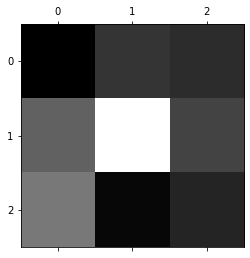

In [10]:
plt.matshow(catboost_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(n_estimators=2000, class_weight='balanced_subsample', criterion="entropy")

rfc_clf.fit(x_train, y_train)

y_RFC_predictions = rfc_clf.predict(x_test)

In [ ]:
RFC_conf_mx = confusion_matrix(y_test, y_RFC_predictions)
RFC_conf_mx

In [ ]:
plt.matshow(RFC_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(max_depth=100)

xgb_clf.fit(x_train, y_train)

y_xgboost_predictions = xgb_clf.predict(x_test)

In [ ]:
xgboost_conf_mx = confusion_matrix(y_test, y_xgboost_predictions)
xgboost_conf_mx

In [ ]:
plt.matshow(xgboost_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(num_leaves =100)

lgb_clf.fit(x_train, y_train)

y_lgb_predictions = lgb_clf.predict(x_test)

In [ ]:
lgb_conf_mx = confusion_matrix(y_test, y_lgb_predictions)
lgb_conf_mx

In [ ]:
plt.matshow(lgb_conf_mx, cmap=plt.cm.gray)
plt.show()